In [119]:
#Q1
# a)

import wikipedia
wiki = wikipedia.page('JackieChan')
text = wiki.content

#jctext = open ('')

In [120]:
# b)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
jcvocabulary  = vectorizer.fit_transform([text])
print (jcvocabulary[0:10])

  (0, 1071)	58
  (0, 409)	249
  (0, 327)	5
  (0, 222)	7
  (0, 15)	2
  (0, 432)	27
  (0, 2137)	2
  (0, 2119)	1
  (0, 1637)	1
  (0, 1872)	1
  (0, 1212)	1
  (0, 1098)	2
  (0, 1746)	2
  (0, 1211)	2
  (0, 1177)	2
  (0, 288)	2
  (0, 1903)	476
  (0, 659)	15
  (0, 1062)	28
  (0, 988)	47
  (0, 1118)	48
  (0, 130)	11
  (0, 814)	5
  (0, 1241)	7
  (0, 237)	1
  :	:
  (0, 1703)	1
  (0, 313)	1
  (0, 1061)	1
  (0, 743)	2
  (0, 1849)	1
  (0, 1200)	1
  (0, 1507)	1
  (0, 329)	1
  (0, 2052)	1
  (0, 1064)	1
  (0, 817)	1
  (0, 630)	1
  (0, 1325)	1
  (0, 993)	1
  (0, 1454)	1
  (0, 1441)	1
  (0, 100)	1
  (0, 330)	1
  (0, 1571)	1
  (0, 1551)	1
  (0, 763)	1
  (0, 1175)	1
  (0, 1019)	1
  (0, 572)	1
  (0, 167)	1


In [121]:
# d)
# Convert words to lowercase
text = text.lower()

# Remove numbers
import re
text = re.sub(r'\d', '', text)

# Punctuation Removal
text = re.sub(r'[^\w\s]', '', text)

# Tokenization

text = text.split()

# Stop word removal
import nltk

stopwords = nltk.corpus.stopwords.words('english')


def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

text =  remove_stopwords(text)

# Stemming 
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

text = stemming (text)

# Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

text = lemmatizer (text)

print (text)

['jacki', 'chan', 'born', 'april', 'chine', '成龍', 'yale', 'roman', 'sìhng', 'lùhng', 'jyutp', 'sing', 'lung', 'lit', 'becom', 'dragon', 'hong', 'kong', 'actor', 'filmmak', 'martial', 'artist', 'stuntman', 'known', 'slapstick', 'acrobat', 'fight', 'style', 'comic', 'time', 'innov', 'stunt', 'typic', 'perform', 'chan', 'act', 'sinc', 'perform', 'film', 'one', 'popular', 'action', 'film', 'star', 'timechan', 'one', 'recognis', 'influenti', 'film', 'person', 'world', 'widespread', 'global', 'follow', 'eastern', 'western', 'hemispher', 'receiv', 'fame', 'star', 'hong', 'kong', 'avenu', 'star', 'hollywood', 'walk', 'fame', 'chan', 'referenc', 'variou', 'pop', 'song', 'cartoon', 'film', 'video', 'game', 'operat', 'train', 'vocalist', 'also', 'cantopop', 'mandopop', 'star', 'releas', 'number', 'music', 'album', 'sung', 'mani', 'theme', 'song', 'film', 'star', 'also', 'global', 'known', 'philanthropist', 'name', 'one', 'top', 'charit', 'celebr', 'forb', 'magazin', 'film', 'scholar', 'andrew', '

In [122]:
# e) 
from nltk import FreqDist

freq_text = FreqDist(text)

print('Most 10:',freq_text.most_common(10))

rearrest_10 = freq_text.most_common().copy()
rearrest_10.reverse()
print('Rearrest 10:',rearrest_10[0:11])


Most 10: [('chan', 229), ('film', 124), ('jacki', 57), ('hong', 47), ('kong', 45), ('stunt', 31), ('star', 31), ('also', 31), ('releas', 30), ('action', 25)]
Rearrest 10: [('allmovi', 1), ('databas', 1), ('imdb', 1), ('link', 1), ('extern', 1), ('read', 1), ('boulevard', 1), ('pictur', 1), ('pmw', 1), ('nomin', 1), ('discographi', 1)]


<Axes: >

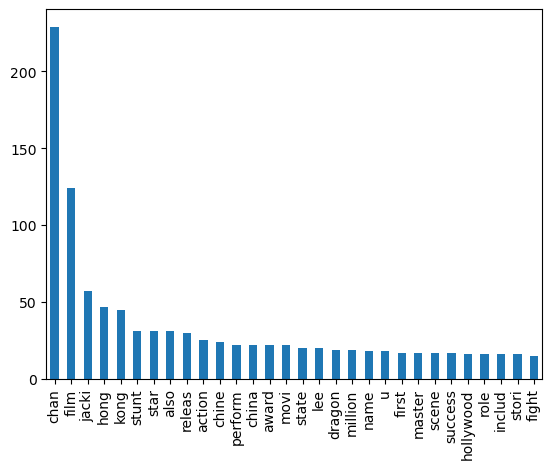

In [123]:
# f)
import matplotlib.pyplot as plt
import pandas as pd

df = pd.Series(dict(freq_text.most_common(30)))
df.plot(kind='bar')


In [124]:
# Q2
# a)
import nltk
import re
import numpy as np
import contractions
import nltk

train = pd.read_csv('D:/emotions/train.txt')
train[['words', 'emo']] = train['words'].str.split(';', expand=True) # modify text to do easier dataframe.

from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

train['tk']=train['words'].apply(regexp.tokenize)

train.head()


,words,emo,tk
0,i didnt feel humiliated,sadness,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,anger,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,love,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,anger,"[i, am, feeling, grouchy]"


In [125]:
# b)
from sklearn.feature_extraction.text import CountVectorizer

cv= CountVectorizer(max_features=1000 ,stop_words='english')

train_prc =cv.fit_transform(train['words'])

print ('By CountVectorizer')
print (train_prc.shape)
print (cv.vocabulary_)

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_features=1000, stop_words='english')
tv.fit_transform(train['words'])
vector = tv.transform(train['words'])
print ('By TfidfVectorizer')
print(vector.toarray().shape)
print(tv.vocabulary_)

By CountVectorizer
(16000, 1000)
{'didnt': 204, 'feel': 294, 'humiliated': 424, 'feeling': 295, 'hopeless': 411, 'hopeful': 410, 'just': 464, 'im': 433, 'minute': 558, 'post': 648, 'greedy': 357, 'wrong': 990, 'nostalgic': 590, 'know': 474, 'grouchy': 359, 'ive': 458, 'little': 506, 'burdened': 92, 'lately': 482, 'wasnt': 943, 'sure': 834, 'taking': 840, 'times': 871, 'lot': 526, 'like': 499, 'funny': 327, 'confused': 145, 'life': 497, 'jaded': 459, 'year': 994, 'old': 598, 'man': 540, 'years': 995, 'huge': 422, 'romantic': 709, 'make': 537, 'suffering': 824, 'seeing': 731, 'mean': 544, 'running': 714, 'divine': 221, 'experience': 272, 'expect': 270, 'type': 896, 'think': 863, 'time': 870, 'dissatisfied': 216, 'low': 533, 'energy': 256, 'general': 331, 'point': 643, 'possible': 646, 'trying': 894, 'write': 987, 'let': 492, 'feels': 297, 'precious': 651, 'reassured': 685, 'anxiety': 29, 'really': 682, 'embarrassed': 249, 'pretty': 656, 'pathetic': 617, 'started': 796, 'sentimental': 736

In [126]:
# c)
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

train = pd.read_csv('D:/emotions/train.txt')
train[['words', 'emo']] = train['words'].str.split(';', expand=True)
X_train= train['words'].values
Y_train = train['emo'].values

tv = TfidfVectorizer(max_features=1000, stop_words='english')
X_train = tv.fit_transform(X_train)

model_re = LogisticRegression()
model_re.fit(X_train, Y_train)

y_pred = model_re.predict(X_train[0:5])

print('From LogisticRegression prediction:', y_pred)
print ('Real one:', Y_train[0:5])

model_nn = MLPClassifier(hidden_layer_sizes=(16, 4), activation='relu', solver='adam') # low hidden_layer_sizes to make it qucik but low accuracy.
model_nn.fit(X_train, Y_train)

y_pred = model_nn.predict(X_train[0:5])

print('From Neural Network  prediction:', y_pred)
print ('Real one:', Y_train[0:5])


c:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


From LogisticRegression prediction: ['sadness' 'sadness' 'anger' 'love' 'anger']
Real one: ['sadness' 'sadness' 'anger' 'love' 'anger']
From Neural Network  prediction: ['sadness' 'sadness' 'anger' 'love' 'anger']
Real one: ['sadness' 'sadness' 'anger' 'love' 'anger']


c:\ProgramData\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [127]:
# d)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

test = pd.read_csv('D:/emotions/test.txt')
test[['words', 'emo']] = test['words'].str.split(';', expand=True)
X_test= test['words'].values
Y_test = test['emo'].values

X_test = tv.fit_transform(X_test)


print (model_re.predict(X_test))

print ('Accuracy of Neural Network: \n', classification_report (model_nn.predict(X_test), Y_test))
print ('Accuracy of Logistic Regression: \n', classification_report (model_re.predict(X_test), Y_test))
print ('Confuison matrix Neural Network: \n', confusion_matrix (model_nn.predict(X_test), Y_test),'\n')
print ('Confuison matrix Neural Network: \n', confusion_matrix (model_re.predict(X_test), Y_test),'\n')

['fear' 'fear' 'sadness' ... 'sadness' 'joy' 'joy']
Accuracy of Neural Network: 
               precision    recall  f1-score   support

       anger       0.12      0.12      0.12       261
        fear       0.12      0.12      0.12       228
         joy       0.32      0.35      0.33       637
        love       0.10      0.12      0.11       137
     sadness       0.33      0.27      0.30       693
    surprise       0.00      0.00      0.00        44

    accuracy                           0.24      2000
   macro avg       0.16      0.16      0.16      2000
weighted avg       0.25      0.24      0.25      2000

Accuracy of Logistic Regression: 
               precision    recall  f1-score   support

       anger       0.08      0.12      0.10       181
        fear       0.10      0.11      0.10       202
         joy       0.43      0.35      0.39       857
        love       0.07      0.14      0.09        76
     sadness       0.28      0.25      0.26       661
    surprise   

In [128]:
# e) 
test_word1 = ['i survey my own posts over the last few years and only feel pleased with vague snippets of a few of them only feel that little bits of them capture what its like to be me or someone like me in dublin in the st century']
test_word1 = tv.fit_transform(test_word1)

test_word2 = ["today i am really happy"]
test_word2 = tv.fit_transform(test_word2)


y_pred1 = model_re.predict(test_word1)
y_pred2 = model_re.predict(test_word2)

print('From LogisticRegression prediction:', y_pred)

print('From Neural Network  prediction:', y_pred)

ValueError: X has 14 features, but LogisticRegression is expecting 1000 features as input.

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


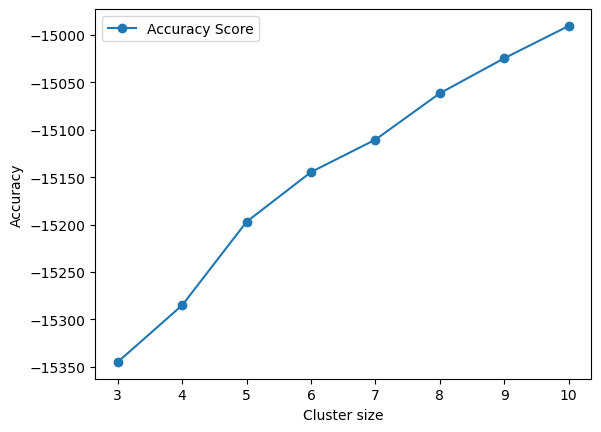

cluster size = 7 is best


In [ ]:
# f)
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
le = preprocessing.LabelEncoder()

train = pd.read_csv('D:/emotions/train.txt')
train[['words', 'emo']] = train['words'].str.split(';', expand=True)

train['emo'] = le.fit_transform(train['emo'])

X_train= train['words'].values
Y_train = train['emo'].values

tv = TfidfVectorizer(max_features=1000, stop_words='english')
X_train = tv.fit_transform(X_train)

import matplotlib.pyplot as plt
scores_kmean = []
x_number = np.arange (3,11,1)

for n_number in range (8):
    kmeans = KMeans(n_clusters=3+n_number).fit(X_train)
    cluster_labels = kmeans.labels_
    scores_kmean.append (kmeans.score(X_train, cluster_labels))

y_number = np.array (scores_kmean)

plt.plot (x_number, y_number,marker='o', label='Accuracy Score')
plt.xlabel ('Cluster size')
plt.ylabel ('Accuracy')
plt.xticks(x_number, x_number)
plt.legend ()
plt.show ()
print ('cluster size = 7 is best')



In [ ]:
# g)

test = pd.read_csv('D:/emotions/test.txt')
test[['words', 'emo']] = test['words'].str.split(';', expand=True)

test['emo'] = le.fit_transform(test['emo'])

X_test= test['words'].values
Y_tess = test['emo'].values

X_test = tv.fit_transform(X_test)

model_kmean = KMeans(n_clusters=7).fit(X_train)

model_nn.predict(X_test)

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array(['fear', 'fear', 'sadness', ..., 'sadness', 'anger', 'joy'],
      dtype='<U8')

In [ ]:
# Q3
# a)
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')

movie_pd = pd.read_csv('D:/movie_data.csv')

X_data = movie_pd['review']
Y_data = movie_pd['sentiment']
X_train, X_test, Y_train, Y_test = train_test_split (X_data.values, Y_data.values, test_size=0.3)

In [ ]:
# b)

import string
import nltk
from nltk.stem import WordNetLemmatizer
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

#defining the function to Preprocess words
def word_preprocess(text):
    #Convert text to lower scale
    prep_text = [x.lower() for x in text]
    #Remove punctuation from text
    string.punctuation
    prep_text=["".join([j for j in i if j not in string.punctuation]) for i in prep_text]
    #Tokenize text
    prep_text = [re.split('W+',i) for i in prep_text]
    #Remove stop words from text
    stopwords = nltk.corpus.stopwords.words('english')
    prep_text= [[j for j in i if j not in stopwords] for i in prep_text]
    #Lemmatize text
    wordnet_lemmatizer = WordNetLemmatizer()
    prep_text = [[wordnet_lemmatizer.lemmatize(word) for word in i] for i in prep_text]
    return np.array(prep_text).flatten()

#Apply preprocess function
X_data = word_preprocess(movie_pd['review'])

X_data.shape

(50000,)

In [ ]:
# c)
X_train, X_test, Y_train, Y_test = train_test_split (X_data, Y_data.values, test_size=0.3)

v = TfidfVectorizer(max_features=1000, stop_words='english',use_idf=True)
x_train_tf = v.fit_transform(X_train)

print(pd.DataFrame(x_train_tf.toarray(), columns=v.vocabulary_).head())

      wasnt  expecting  lot  film  directed  starring  got  comment    rate  \
0  0.196832        0.0  0.0   0.0       0.0       0.0  0.0      0.0  0.0000   
1  0.078263        0.0  0.0   0.0       0.0       0.0  0.0      0.0  0.0000   
2  0.000000        0.0  0.0   0.0       0.0       0.0  0.0      0.0  0.0852   
3  0.000000        0.0  0.0   0.0       0.0       0.0  0.0      0.0  0.0000   
4  0.000000        0.0  0.0   0.0       0.0       0.0  0.0      0.0  0.0000   

   action  ...       son   mr  common  chemistry  english  literally  \
0     0.0  ...  0.000000  0.0     0.0        0.0      0.0        0.0   
1     0.0  ...  0.000000  0.0     0.0        0.0      0.0        0.0   
2     0.0  ...  0.000000  0.0     0.0        0.0      0.0        0.0   
3     0.0  ...  0.113003  0.0     0.0        0.0      0.0        0.0   
4     0.0  ...  0.000000  0.0     0.0        0.0      0.0        0.0   

    earlier  near   culture  christmas  
0  0.000000   0.0  0.000000        0.0  
1  0.00000

In [ ]:
# d)
print (x_train_tf[0:50])

  (0, 29)	0.13393026185733667
  (0, 835)	0.11067334268111256
  (0, 289)	0.13243155199987156
  (0, 926)	0.10662790742326143
  (0, 629)	0.1036335782038941
  (0, 524)	0.07498389441398591
  (0, 176)	0.1050294802520833
  (0, 640)	0.10075126417007921
  (0, 528)	0.09722322299622403
  (0, 337)	0.1269343483859678
  (0, 498)	0.11794318453211415
  (0, 133)	0.07018114061245391
  (0, 523)	0.12383648468049518
  (0, 786)	0.13715580766002658
  (0, 724)	0.12413094735092361
  (0, 387)	0.09516014473644802
  (0, 215)	0.12878474594670294
  (0, 549)	0.12930008954072558
  (0, 502)	0.04902446282049588
  (0, 826)	0.061356705660099826
  (0, 900)	0.0946976064737043
  (0, 374)	0.11668477490132013
  (0, 400)	0.10198031078136381
  (0, 107)	0.1091845063063705
  (0, 526)	0.11221309955098346
  :	:
  (49, 744)	0.08560951923533001
  (49, 951)	0.0589367965715641
  (49, 813)	0.11155486774535493
  (49, 561)	0.08055158915001043
  (49, 869)	0.08088950110868058
  (49, 692)	0.08498685393010796
  (49, 474)	0.06345346561616688
 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_features=1000, stop_words='english')
x_test_tf = tv.fit_transform(X_test)
knn = KNeighborsClassifier()
knn.fit (x_train_tf, Y_train)
print (knn.score(x_train_tf[0:100], Y_train[0:100]))


0.86


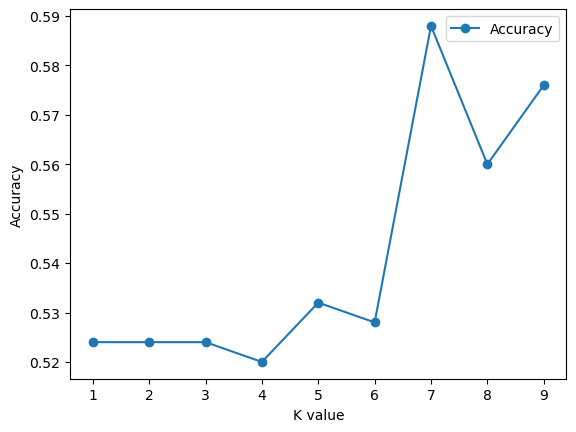

In [ ]:
# e)
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

knn = KNeighborsClassifier()
scores_knn = []
x_number = np.arange (1,10,1)

x_test_tf = tv.fit_transform(X_test)

for n_number in range (9):
    knn = KNeighborsClassifier(n_neighbors=n_number+1)
    knn.fit (x_train_tf, Y_train)
    scores_knn.append (knn.score(x_test_tf[0:250], Y_test[0:250])) # when I use test set to score it, it keep calculating, so I use  first 250 set to show accuracy

y_number = np.array (scores_knn)

plt.plot (x_number, y_number,marker='o', label='Accuracy')
plt.xlabel ('K value')
plt.ylabel ('Accuracy')
plt.xticks(x_number, x_number)
plt.legend ()
plt.show ()


In [ ]:
# f)
import pathlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=1)
model_rf.fit(x_train_tf, Y_train)

model_re = LogisticRegression()
model_re.fit(x_train_tf, Y_train)

from tensorflow import keras
from tensorflow.keras import layers

model_dl = keras.Sequential (
    [layers.Input(shape=1000),
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1),]
    )
model_dl.compile ()
# model_dl.fit (x_train_tf, Y_train)  !!!

# when i use kreas it show indices[2] = [0,289] is out of order. Many sparse ops require sorted indices. So i use previous Neural Network to fit this data.

model_nn.fit(x_train_tf, Y_train)

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(16, 4))

In [ ]:
# g)

knn = KNeighborsClassifier(n_neighbors=7) # pick best number for this test
knn.fit (x_train_tf, Y_train)

print ('Confuison matrix knn: \n', confusion_matrix (knn.predict(x_test_tf[0:250]), Y_test[0:250]),'\n')
print ('Confuison matrix Random Forest: \n', confusion_matrix (model_rf.predict(x_test_tf[0:250]), Y_test[0:250]),'\n')
print ('Confuison matrix Random Forest: \n', confusion_matrix (model_rf.predict(x_test_tf[0:250]), Y_test[0:250]),'\n')
print ('Confuison matrix Logistic Regression: \n', confusion_matrix (model_re.predict(x_test_tf[0:250]), Y_test[0:250]),'\n')
print ('Confuison matrix Deep Neural Network: \n', confusion_matrix (model_nn.predict(x_test_tf[0:250]), Y_test[0:250]),'\n')

Confuison matrix knn: 
 [[100  73]
 [ 30  47]] 

Confuison matrix Random Forest: 
 [[65 40]
 [65 80]] 

Confuison matrix Random Forest: 
 [[65 40]
 [65 80]] 

Confuison matrix Logistic Regression: 
 [[68 34]
 [62 86]] 

Confuison matrix Deep Neural Network: 
 [[66 38]
 [64 82]] 



In [130]:
# Q4
#a)
train_img = pd.read_csv('D:/image_caption.txt')
train_img[['ID', 'caption']] = train_img['IDcaption'].str.split('\t', expand=True) # modify text to do easier dataframe.
train_img.head()

,IDcaption,ID,caption
0,ImageCLEFmedCaption_2022_train_000001\tpericar...,ImageCLEFmedCaption_2022_train_000001,pericardial tamponade with clear distinction o...
1,ImageCLEFmedCaption_2022_train_000002\tangiogr...,ImageCLEFmedCaption_2022_train_000002,angiography of the aortic arch show delay visu...
2,ImageCLEFmedCaption_2022_train_000003\tballoon...,ImageCLEFmedCaption_2022_train_000003,balloonocclude retrograde transvenous oblitera...
3,ImageCLEFmedCaption_2022_train_000004\tfilm af...,ImageCLEFmedCaption_2022_train_000004,film after glue embolization show no filling i...
4,ImageCLEFmedCaption_2022_train_000005\tperiphe...,ImageCLEFmedCaption_2022_train_000005,peripheral in posteroanterior projection angio...


In [129]:
# b)
X_data = word_preprocess(train_img['caption'])
X_data[0:5]

array(['pericardial tamponade with clear distinction of epicardial border  and pericardium',
       'angiography of the aortic arch show delay visualization of the aberrant right subclavian artery arrow',
       'balloonocclude retrograde transvenous obliteration be attempt use a coaxial and double interruption system cytography be perform by insert the catheter into the shunt complete balloon occlusion be not achieve with a  balloon catheter arrow  the  mm balloon be inflate when the guide balloon catheter be fix at the optimum position arrow  follow which stasis of the contrast medium be observe we then perform balloonocclude retrograde transvenous obliteration use a sclerosing agent',
       'film after glue embolization show no filling in the pseudoaneurysm and the glue angiocatheter',
       'peripheral in posteroanterior projection angiography total occlusion in the left popliteal artery black arrow be observe with distal collateral filling white arrow'],
      dtype='<U836')